In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('OnlineRetail_small.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1499 non-null   object 
 1   StockCode    1499 non-null   object 
 2   Description  1498 non-null   object 
 3   Quantity     1499 non-null   object 
 4   InvoiceDate  1499 non-null   object 
 5   UnitPrice    1499 non-null   float64
 6   CustomerID   1442 non-null   object 
 7   Country      1490 non-null   object 
dtypes: float64(1), object(7)
memory usage: 93.8+ KB


## Tiền xử lý dữ liệu
- Kiểm tra, xóa bó, thay thế dữ liệu khiếm khuyết
- Phát hiện dữ liệu ngoại lai
- Chuẩn hóa dữ liệu

In [4]:
#Kiểm tra, xóa bó, thay thế dữ liệu khiếm khuyết
from utils import *

get_random_row(df, size=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
664,536415,22632,HAND WARMER RED RETROSPOT,3,12/1/10 11:57,2.10,12838,United Kingdom
665,536415,21916,SET 12 RETRO WHITE CHALK STICKS,2,12/1/10 11:57,0.42,12838,United Kingdom
666,536415,22587,FELTCRAFT HAIRBAND RED AND BLUE,4,12/1/10 11:57,0.85,12838,United Kingdom
667,536415,22566,FELTCRAFT HAIRBAND PINK AND PURPLE,3,12/1/10 11:57,0.85,12838,United Kingdom
668,536415,22565,FELTCRAFT HAIRBANDS PINK AND WHITE,3,12/1/10 11:57,0.85,12838,United Kingdom
669,536415,22472,TV DINNER TRAY DOLLY GIRL,2,12/1/10 11:57,4.95,12838,United Kingdom
670,536415,22557,PLASTERS IN TIN VINTAGE PAISLEY,3,12/1/10 11:57,1.65,12838,United Kingdom
671,536415,22551,PLASTERS IN TIN SPACEBOY,3,12/1/10 11:57,1.65,12838,United Kingdom
672,536415,22554,PLASTERS IN TIN WOODLAND ANIMALS,3,12/1/10 11:57,1.65,12838,United Kingdom
673,536415,22534,MAGIC DRAWING SLATE SPACEBOY,3,12/1/10 11:57,0.42,12838,United Kingdom


In [5]:
#Tìm ra vị trí lỗi và null
#Sử dụng hàm isna()
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1494,False,False,False,False,False,False,True,False
1495,False,False,False,False,False,False,True,False
1496,False,False,False,False,False,False,True,False
1497,False,False,False,False,False,False,True,False


In [6]:
df.isna()[(df.isna().CustomerID == True) | (df.isna().Description == True) | (df.isna().Country == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40,False,False,False,False,False,False,False,True
521,False,False,False,False,False,False,False,True
537,False,False,False,False,False,False,False,True
611,False,False,False,False,False,False,False,True
617,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
1494,False,False,False,False,False,False,True,False
1495,False,False,False,False,False,False,True,False
1496,False,False,False,False,False,False,True,False
1497,False,False,False,False,False,False,True,False


In [7]:
pd.set_option('display.max_rows', 500)
df[(df.isna().CustomerID == True) | (df.isna().Description == True) | (df.isna().Country == True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40,536370,22900 SET 2 TEA TOWELS I LOVE LONDON,24,12/1/10 8:45,2.95,12583.00,France,NaN
521,536409,22900 SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.00,United Kingdom,NaN
537,536409,22900 SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.00,United Kingdom,NaN
611,536412,22900 SET 2 TEA TOWELS I LOVE LONDON,2,12/1/10 11:49,2.95,17920.00,United Kingdom,NaN
617,536412,22900 SET 2 TEA TOWELS I LOVE LONDON,2,12/1/10 11:49,2.95,17920.00,United Kingdom,NaN
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
641,536415,22900 SET 2 TEA TOWELS I LOVE LONDON,3,12/1/10 11:57,2.95,12838.00,United Kingdom,NaN
927,536500,22900 SET 2 TEA TOWELS I LOVE LONDON,7,12/1/10 12:35,2.95,17377.00,United Kingdom,NaN
1057,536522,72800B 4 PURPLE FLOCK DINNER CANDLES,2,12/1/10 12:49,2.55,15012.00,United Kingdom,NaN
1164,536528,22900 SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 13:17,2.95,15525.00,United Kingdom,NaN


In [8]:
#Sử dụng dropna để xóa các dòng có cell bị rỗng
df_clean = df.dropna(axis=0)
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
1438,536542,20711,JUMBO BAG TOYS,20,12/1/10 14:11,1.95,16456,United Kingdom
1439,536542,20713,JUMBO BAG OWLS,30,12/1/10 14:11,1.95,16456,United Kingdom
1440,536542,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/10 14:11,2.95,16456,United Kingdom
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,12/1/10 14:30,2.10,17841,United Kingdom


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 1442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1433 non-null   object 
 1   StockCode    1433 non-null   object 
 2   Description  1433 non-null   object 
 3   Quantity     1433 non-null   object 
 4   InvoiceDate  1433 non-null   object 
 5   UnitPrice    1433 non-null   float64
 6   CustomerID   1433 non-null   object 
 7   Country      1433 non-null   object 
dtypes: float64(1), object(7)
memory usage: 100.8+ KB


In [ ]:
#Sử dugj fillna để tự điền dữ liệu tự động
#syntax df.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
#Tham số value có thể là giá trị củ thể hoặc là một dict áp dụng cho từng cột riêng biệt {'A': value_1, 'B': vlaue_2}
#Tham số method: Phương án lấp các cell na. Sử dụng khi không truyền tham số value. Có các giá trị backfill, bfill, pad, ffill, None
#ffill: Thay thế bằng gí trij trước. Nếu axis = 0, thay thế bằng ô phía trước tính theo dòng. Nếu axis=1 thì lấy ô phía trước nhưng thính theo cột
#bfill: Tương tự ffill nhưng lấy phía sau

In [10]:
df_clean['Total'] = df_clean['Quantity'].astype('int64') * df_clean['UnitPrice']

df_clean

/tmp/ipykernel_12033/1449685357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total'] = df_clean['Quantity'].astype('int64') * df_clean['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
1438,536542,20711,JUMBO BAG TOYS,20,12/1/10 14:11,1.95,16456,United Kingdom,39.00
1439,536542,20713,JUMBO BAG OWLS,30,12/1/10 14:11,1.95,16456,United Kingdom,58.50
1440,536542,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/10 14:11,2.95,16456,United Kingdom,94.40
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,12/1/10 14:30,2.10,17841,United Kingdom,-2.10


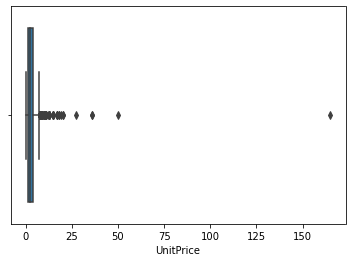

In [13]:
#Sử lý dữ liệu ngoại lai 
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_clean['UnitPrice']);

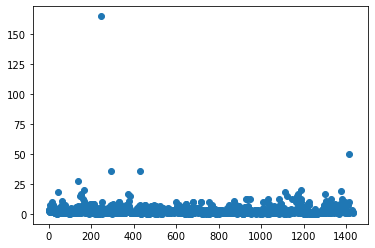

In [14]:
plt.scatter(x=range(df_clean.shape[0]), y=df_clean['UnitPrice'])

In [16]:
df4 = pd.read_csv('investment.csv')
df4.head()

,Unnamed: 0,Tiền đầu tư,Lợi nhuận
0,0,70.545713,61.763676
1,1,46.709199,6.998761
2,2,58.608755,83.940544
3,3,51.868149,24.914372
4,4,31.000763,92.371890


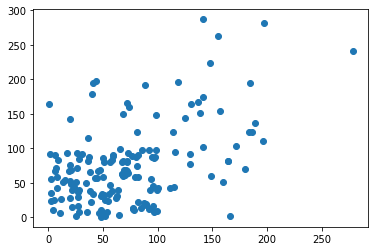

In [17]:
plt.scatter(x=df4['Tiền đầu tư'], y=df4['Lợi nhuận'])

<AxesSubplot:xlabel='Lợi nhuận'>

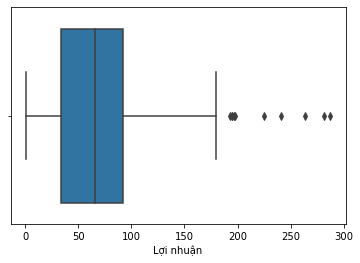

In [18]:
sns.boxplot(x=df4['Lợi nhuận'])

(array([36., 34., 38., 23.,  8.,  9.,  7.,  1.,  1.,  3.]),
 array([  0.80473764,  29.44585151,  58.08696538,  86.72807925,
        115.36919312, 144.01030699, 172.65142086, 201.29253473,
        229.9336486 , 258.57476247, 287.21587634]),
 <BarContainer object of 10 artists>)

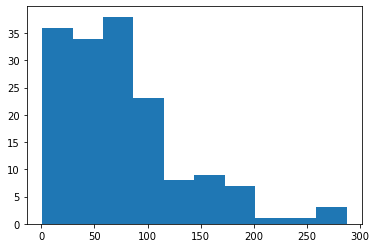

In [19]:
#Xác định dữ liệu ngoại lai bằng IQR-Score
plt.hist(df4['Lợi nhuận'])

Các bước xử dụng IQR
- Tính Q1 = data.quantile(0.25)
- Tính Q3 = data.quantile(0.75)
- Tính IQR = Q3 - Q1

Những điểm ngoại lai sẽ nằm trong khoảng [data < (Q1 - 1.5 * IQR) | data > (Q3 + 1.5 * IQR)]

Những điểm không ngoại lai (dữ liệu tốt) nằm trong khoảng [data > (Q1 - 1.5 * IQR) & data < (Q3 + 1.5 * IQR)]

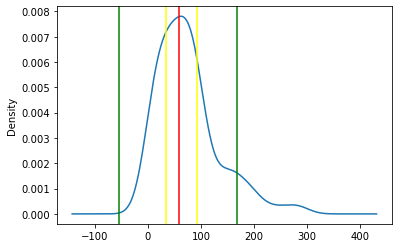

In [33]:
df4['Lợi nhuận'].plot.density()
Q1 = df4['Lợi nhuận'].quantile(0.25)
Q3 = df4['Lợi nhuận'].quantile(0.75)
IQR = Q3 - Q1
plt.axvline(Q1, color='yellow')
plt.axvline(Q3, color='yellow')
plt.axvline(IQR, color='red')
plt.axvline(Q1 - 1.5 * IQR, color='green')
plt.axvline(Q3 + 1.3 * IQR, color='green')

In [ ]:
#Xử lý dữ liệu ngoại lai sử dụng Z-score


Các bước sử dụng Z-Score

- Sử dụng z-socre của scipy
- Tính z-score: z = np.abs(stats.zscore(data))
- Dùng lệnh np.where để lọc

In [43]:
from scipy import stats
z = np.abs(stats.zscore(df4))
print(type(z))
z.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Tiền đầu tư,Lợi nhuận
0,1.721259,0.028097,0.230601
1,1.699608,0.497596,1.177273
2,1.677957,0.263215,0.152751
3,1.656306,0.395982,0.867582
4,1.634655,0.806999,0.298496


In [44]:
threshold = 3
np.where(z > threshold)

(array([ 75,  76, 157, 159]), array([2, 2, 1, 2]))